# Youtube Trending Video Analytics

### IMPORTING LIBRARY

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

DATASET LINK- https://www.kaggle.com/datasets/datasnaek/youtube-new?select=USvideos.csv

## DATA CLEANING AND STANDARDIZATION

In [2]:
# Define the data directory path
data_path = '/content/drive/MyDrive/raw_youtube_regions'

In [3]:
# Create an empty list to hold all dataframes
df_list = []

In [4]:
# List CSV files from different regions
files = [f for f in os.listdir('/content/drive/MyDrive/raw_youtube_regions') if f.endswith('.csv')]

# Loop through each file
for file in files:
    region = file[:2].upper()  # 'USvideos.csv' -> 'US'
    df = pd.read_csv(os.path.join('/content/drive/MyDrive/raw_youtube_regions', file), encoding='latin-1')

    # Add a 'region' column
    df['region'] = region

    # Standardize column names (lowercase and underscores)
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

    # Parse the dates
    if 'trending_date' in df.columns:
            df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce', format='%y.%d.%m')
    if 'publish_time' in df.columns:
            df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

    # Remove Duplicate
    df.drop_duplicates(inplace=True)

    # Append the processed dataframe to the list
    df_list.append(df)

In [5]:
# Add a 'region' column
df['region'] = region

In [6]:
# Standardize column names (lowercase and underscores)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

## PARSE THE DATES

In [7]:
if 'trending_date' in df.columns:
        df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce', format='%y.%d.%m')
if 'publish_time' in df.columns:
        df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

### Remove Duplicate

In [8]:
df.drop_duplicates(inplace=True)

## Combine all datasets

In [9]:
cdf = pd.concat(df_list, ignore_index=True)

In [10]:
cdf.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,region
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,US
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,US
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,US


In [11]:
cdf.shape

(363372, 17)

In [12]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363372 entries, 0 to 363371
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   video_id                363372 non-null  object             
 1   trending_date           363372 non-null  datetime64[ns]     
 2   title                   363372 non-null  object             
 3   channel_title           363372 non-null  object             
 4   category_id             363372 non-null  int64              
 5   publish_time            363372 non-null  datetime64[ns, UTC]
 6   tags                    363372 non-null  object             
 7   views                   363372 non-null  int64              
 8   likes                   363372 non-null  int64              
 9   dislikes                363372 non-null  int64              
 10  comment_count           363372 non-null  int64              
 11  thumbnail_link          36

In [13]:
cdf.isnull().sum()

,0
video_id,0
trending_date,0
title,0
channel_title,0
category_id,0
publish_time,0
tags,0
views,0
likes,0
dislikes,0


DROPPING THE DESCRIPTION COLUMN AS IT IS NOT ESSENTIAL FOR  ANALYSIS

<Axes: >

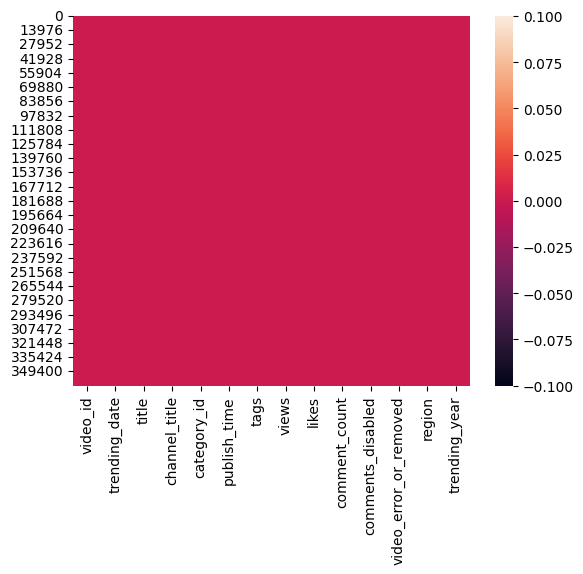

In [39]:
sns.heatmap(cdf.isnull())

In [15]:
cdf.isnull().sum()

,0
video_id,0
trending_date,0
title,0
channel_title,0
category_id,0
publish_time,0
tags,0
views,0
likes,0
dislikes,0


ALL THE BLANKS ARE BEEN HANDLED

In [16]:
cdf.to_csv('Cleaned_youtube_dataset.csv', index=False, encoding='utf-8-sig')

## Data Profiling

In [17]:
cdf.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,region
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,US
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,US
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,US


In [18]:
cdf.dtypes

,0
video_id,object
trending_date,datetime64[ns]
title,object
channel_title,object
category_id,int64
publish_time,"datetime64[ns, UTC]"
tags,object
views,int64
likes,int64
dislikes,int64


In [19]:
cdf.nunique()

,0
video_id,184287
trending_date,205
title,186272
channel_title,37824
category_id,18
publish_time,169286
tags,142211
views,240399
likes,73693
dislikes,16715


In [20]:
cdf.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'region'],
      dtype='object')

# EDA

### Most data available by which year

In [21]:
cdf["trending_date"].value_counts()

,count
trending_date,
2018-02-12,1883
2018-03-06,1880
2018-02-20,1879
2018-02-17,1871
2018-03-13,1867
...,...
2018-02-02,1585
2018-05-19,1538
2018-03-15,1515


In [22]:
cdf['trending_year'] = cdf['trending_date'].dt.year
cdf['trending_year'].value_counts()

,count
trending_year,
2018,279135
2017,84237


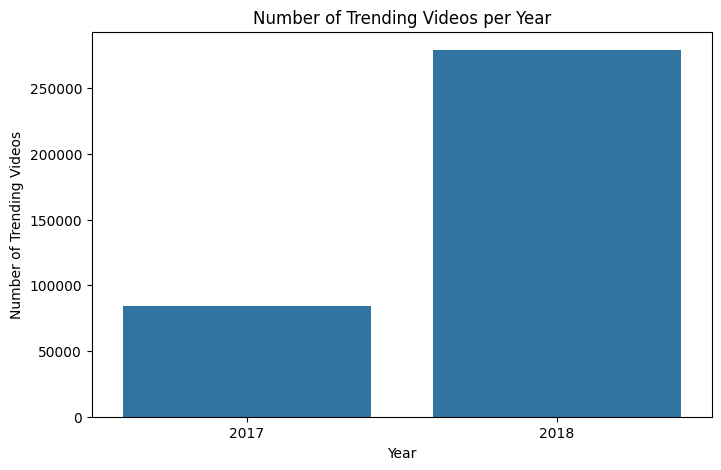

In [23]:
yearly_counts = cdf['trending_year'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=yearly_counts.index, y=yearly_counts.values)
plt.title('Number of Trending Videos per Year')
plt.xlabel('Year')
plt.ylabel('Number of Trending Videos')
plt.show()

In [24]:
cdf['trending_year'] = cdf['trending_date'].dt.year
cdf['trending_year'].value_counts()/len(cdf)*100

,count
trending_year,
2018,76.817972
2017,23.182028


INSIGHTS:-The dataset was collected in 2017 and 2018 with around 76% of it in 2018 and 24% in 2017.

In [25]:
cdf.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'region', 'trending_year'],
      dtype='object')

### Rank category_id by average views

In [26]:
# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Write the DataFrame to a SQLite table
cdf.to_sql('youtube_data', conn, index=False, if_exists='replace')

# Write and execute the SQL query
query = """
SELECT category_id, AVG(views) as average_views
FROM youtube_data
GROUP BY category_id
ORDER BY average_views DESC
LIMIT 10;
"""

avg_views_by_category = pd.read_sql_query(query, conn)

# Display the results
display(avg_views_by_category)

# Close the connection
conn.close()

,category_id,average_views
0,10,6.094538e+06
1,30,1.774643e+06
2,1,1.327032e+06
3,28,1.115871e+06
4,24,9.635065e+05
5,23,8.203270e+05
6,17,8.078187e+05
7,20,6.818134e+05
8,26,5.204091e+05
9,43,4.430091e+05


CATEGORY_ID 10 HAS THE MOST AVERAGE VIEWS FOLLOWED BY 30 AND 1

In [27]:
# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Write the DataFrame to a SQLite table
cdf.to_sql('youtube_data', conn, index=False, if_exists='replace')

# Write and execute the SQL query
query = """
SELECT category_id, AVG(likes) as average_likes
FROM youtube_data
GROUP BY category_id
ORDER BY average_likes DESC
LIMIT 10;
"""

avg_likes_by_category = pd.read_sql_query(query, conn)

# Display the results
display(avg_likes_by_category)

# Close the connection
conn.close()

,category_id,average_likes
0,10,171562.539803
1,23,40245.188442
2,29,33744.057824
3,28,30534.580813
4,1,28467.353885
5,20,26612.778360
6,24,26483.093509
7,30,25083.866667
8,26,18614.234882
9,17,17095.653831


CATEGORY_ID 10 HAS THE MOST AVERAGE LIKES AGAIN FOLLOWED BY FOLLOWED BY 23 AND 29. UNLIKE VIEWS WHERE ID 30 AND 1 WAS FORUNNER IN TOP 3

In [28]:
# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Write the DataFrame to a SQLite table
cdf.to_sql('youtube_data', conn, index=False, if_exists='replace')

# Write and execute the SQL query
query = """
SELECT category_id, AVG(comment_count) as average_comment_count
FROM youtube_data
GROUP BY category_id
ORDER BY average_comment_count DESC
LIMIT 10;
"""

avg_comment_count_by_category = pd.read_sql_query(query, conn)

# Display the results
display(avg_comment_count_by_category)

# Close the connection
conn.close()

,category_id,average_comment_count
0,10,14619.448787
1,29,9713.973979
2,28,5546.878904
3,20,4343.774473
4,23,4106.011658
5,24,3801.572332
6,1,3165.432625
7,26,2637.159480
8,17,2010.046364
9,22,1903.338547


CATEGORY_ID 10 HAS THE MOST AVERAGE COMMENTS AGAIN FOLLOWED BY FOLLOWED BY 29 AND 28.

## Let's import the category name table

In [30]:
data=pd.read_csv('/content/categoryid-title.csv')

In [31]:
data.head()

,category_id,title
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports


### MOST LOVED CONTENT CATEGORY

In [32]:
# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Write both DataFrames to SQLite tables
cdf.to_sql('youtube_data', conn, index=False, if_exists='replace')
data.to_sql('category_names', conn, index=False, if_exists='replace')

# Write and execute the SQL query to join and count category which are frequently seen th
query = """
SELECT
    cn.title,
    COUNT(yd.category_id) as total_count
FROM
    youtube_data yd
JOIN
    category_names cn ON yd.category_id = cn.category_id
GROUP BY
    cn.title
ORDER BY
    total_count DESC
    LIMIT 5;
"""

category_counts_with_names = pd.read_sql_query(query, conn)

# Display the results
display(category_counts_with_names)

# Close the connection
conn.close()

,title,total_count
0,Entertainment,104567
1,People & Blogs,52297
2,Music,41454
3,News & Politics,35746
4,Comedy,26077


/tmp/ipython-input-3271183925.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_count', y='title', data=category_counts_with_names, palette='viridis')


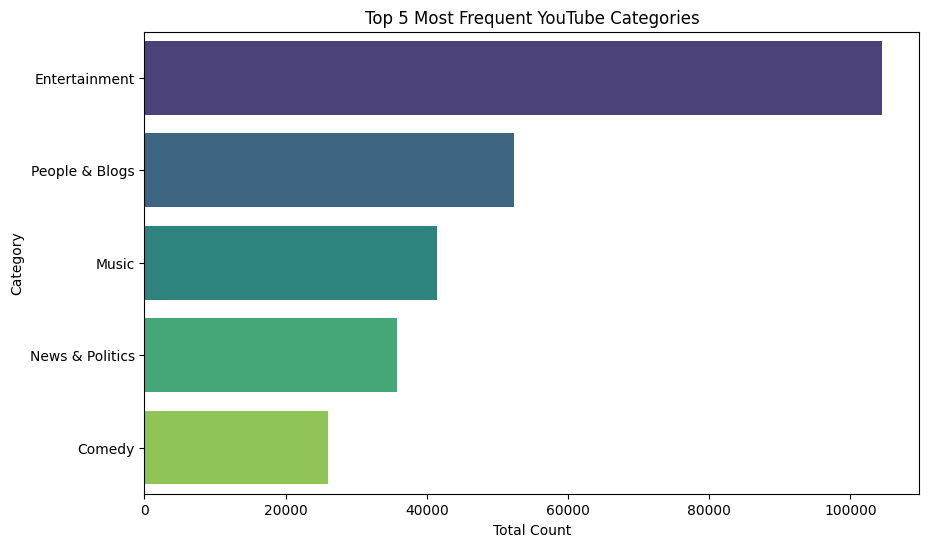

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x='total_count', y='title', data=category_counts_with_names, palette='viridis')
plt.title('Top 5 Most Frequent YouTube Categories')
plt.xlabel('Total Count')
plt.ylabel('Category')
plt.show()

### AVERAGE VIEWS ,COMMENTS, LIKES BY CATEGORY

/tmp/ipython-input-1853228001.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_views', y='title', data=avg_views_named.sort_values(by='average_views', ascending=False), palette='viridis')


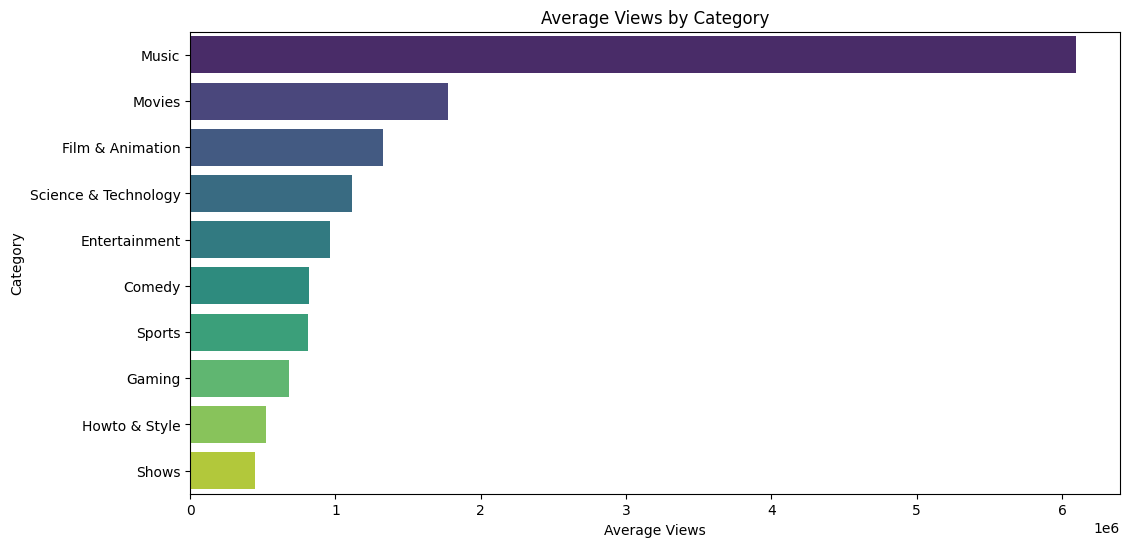

/tmp/ipython-input-1853228001.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_likes', y='title', data=avg_likes_named.sort_values(by='average_likes', ascending=False), palette='viridis')


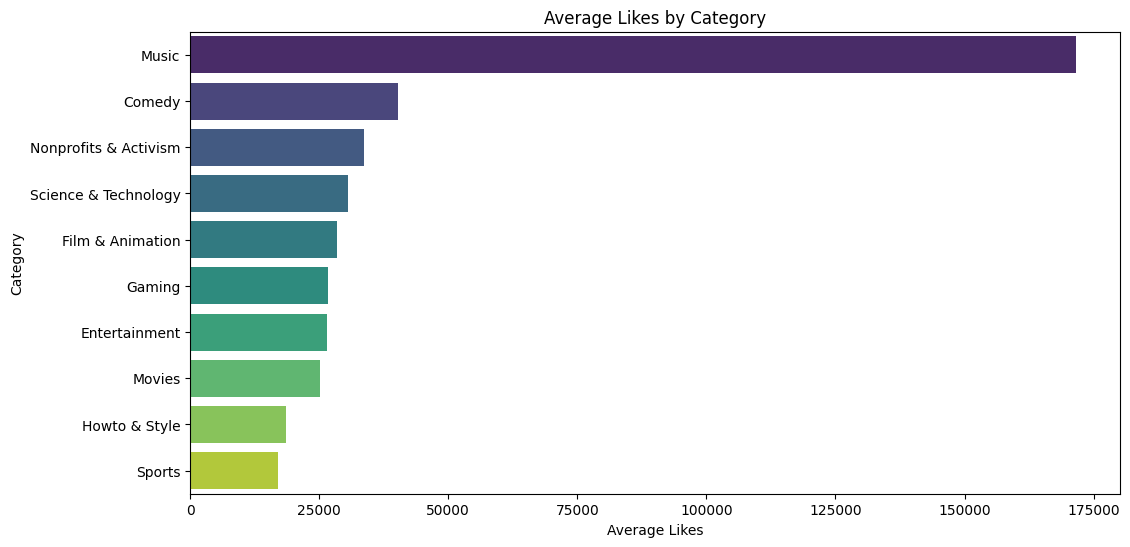

/tmp/ipython-input-1853228001.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_comment_count', y='title', data=avg_comment_count_named.sort_values(by='average_comment_count', ascending=False), palette='viridis')


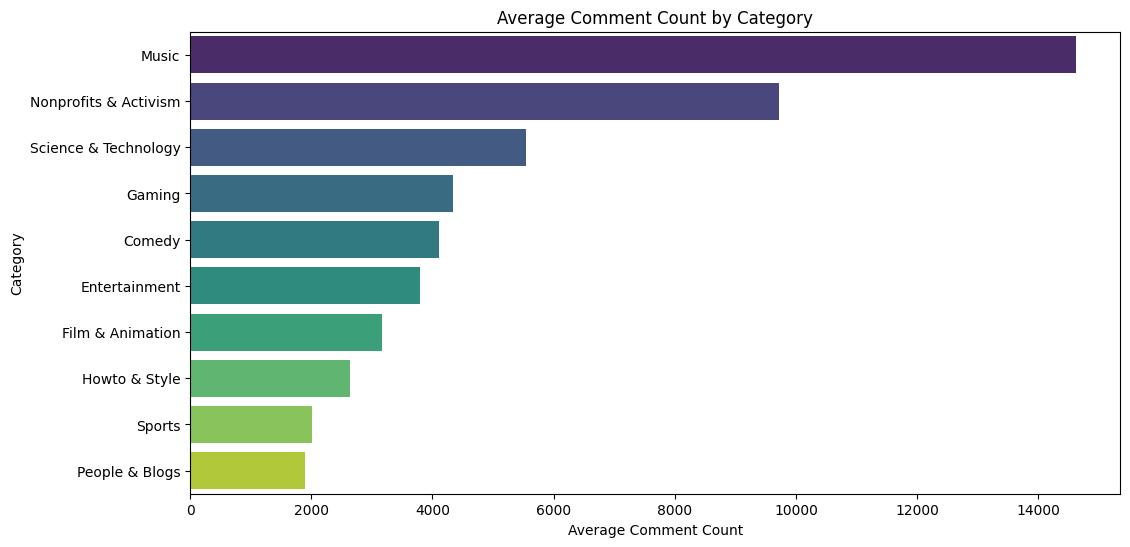

In [34]:
# Merge average views with category names
avg_views_named = pd.merge(avg_views_by_category, data, on='category_id', how='left')

# Merge average likes with category names
avg_likes_named = pd.merge(avg_likes_by_category, data, on='category_id', how='left')

# Merge average comment count with category names
avg_comment_count_named = pd.merge(avg_comment_count_by_category, data, on='category_id', how='left')

# Visualize average views by category name
plt.figure(figsize=(12, 6))
sns.barplot(x='average_views', y='title', data=avg_views_named.sort_values(by='average_views', ascending=False), palette='viridis')
plt.title('Average Views by Category')
plt.xlabel('Average Views')
plt.ylabel('Category')
plt.show()

# Visualize average likes by category name
plt.figure(figsize=(12, 6))
sns.barplot(x='average_likes', y='title', data=avg_likes_named.sort_values(by='average_likes', ascending=False), palette='viridis')
plt.title('Average Likes by Category')
plt.xlabel('Average Likes')
plt.ylabel('Category')
plt.show()

# Visualize average comment count by category name
plt.figure(figsize=(12, 6))
sns.barplot(x='average_comment_count', y='title', data=avg_comment_count_named.sort_values(by='average_comment_count', ascending=False), palette='viridis')
plt.title('Average Comment Count by Category')
plt.xlabel('Average Comment Count')
plt.ylabel('Category')
plt.show()

In [35]:
cdf.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,region,trending_year
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US,2017
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US,2017
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,US,2017
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,US,2017
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,US,2017


### DROPPING RATING DISABLED, DESCRIPTION,THUMBNAIL_LINK, DISLIKE COLUMN

In [38]:
cdf.drop(columns=['dislikes'], inplace=True)
display(cdf.head())

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,comment_count,comments_disabled,video_error_or_removed,region,trending_year
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,15954,False,False,US,2017
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,12703,False,False,US,2017
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,8181,False,False,US,2017
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,2146,False,False,US,2017
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,17518,False,False,US,2017


DROPPED RATING DISABLED, DESCRIPTION,THUMBNAIL_LINK AS IT HAS NO ROLE TO PLAY IN THE FURTHER ANALYSIS. ALSO DROPPED DISLIKE COLUMN AS AFTER NEW UPDATE IN YOUTUBE IT IS NOT A PUBLICILY AVALIABLE SO IT'S IRREVELANT.

In [40]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363372 entries, 0 to 363371
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   video_id                363372 non-null  object             
 1   trending_date           363372 non-null  datetime64[ns]     
 2   title                   363372 non-null  object             
 3   channel_title           363372 non-null  object             
 4   category_id             363372 non-null  int64              
 5   publish_time            363372 non-null  datetime64[ns, UTC]
 6   tags                    363372 non-null  object             
 7   views                   363372 non-null  int64              
 8   likes                   363372 non-null  int64              
 9   comment_count           363372 non-null  int64              
 10  comments_disabled       363372 non-null  bool               
 11  video_error_or_removed  36

### TOP VIEWS CHANNEL REGION WISE

In [43]:
# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Write the DataFrame to a SQLite table
cdf.to_sql('youtube_data', conn, index=False, if_exists='replace')

# Write and execute the SQL query
query = """
WITH RankedChannels AS (
    SELECT
        region,
        channel_title,
        SUM(views) as total_views,
        RANK() OVER (PARTITION BY region ORDER BY SUM(views) DESC) as rank
    FROM
        youtube_data
    GROUP BY
        region, channel_title
)
SELECT
    region,
    channel_title,
    total_views
FROM
    RankedChannels
WHERE
    rank = 1
ORDER BY
    region, rank;
"""

top_channels_by_region = pd.read_sql_query(query, conn)

# Display the results
display(top_channels_by_region)

# Close the connection
conn.close()

,region,channel_title,total_views
0,CA,Marvel Entertainment,1011420205
1,DE,Marvel Entertainment,585900476
2,FR,Dude Perfect,305226697
3,GB,NickyJamTV,8516190092
4,IN,T-Series,1748057724
5,JP,ibighit,138038653
6,KR,Marvel Entertainment,920959738
7,MX,Marvel Entertainment,383058026
8,RU,Ð¢ÑÑÐ¼ Ð¢ÑÑÐ¼,178367393
9,US,ChildishGambinoVEVO,3758488765


By this we can clearly say that the watch time revenue of this channels are the most in the respective regions.Here, Marvel Entertainment shows a clear winner image as it has been the top watched content in 4 out of 10 region.

### TOP COMMENTED CHANNEL REGION WISE

In [44]:
# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Write the DataFrame to a SQLite table
cdf.to_sql('youtube_data', conn, index=False, if_exists='replace')

# Write and execute the SQL query
query2 = """
WITH RankedChannels AS (
    SELECT
        region,
        channel_title,
        SUM(comment_count) as total_comment,
        RANK() OVER (PARTITION BY region ORDER BY SUM(comment_count) DESC) as rank
    FROM
        youtube_data
    GROUP BY
        region, channel_title
)
SELECT
    region,
    channel_title,
    total_comment
FROM
    RankedChannels
WHERE
    rank = 1
ORDER BY
    region, rank;
"""

top_channels_by_region_on_comment = pd.read_sql_query(query2, conn)

# Display the results
display(top_channels_by_region_on_comment)

# Close the connection
conn.close()

,region,channel_title,total_comment
0,CA,ibighit,9156753
1,DE,ibighit,6745695
2,FR,ibighit,5753970
3,GB,ibighit,41660052
4,IN,Technical Guruji,6387995
5,JP,ibighit,2800447
6,KR,ibighit,11537804
7,MX,ibighit,3887278
8,RU,Wylsacom,3798416
9,US,ibighit,31817464


ibighit shows a clear majority in the most commented channel region wise 8 out of 10 except for India and Russia.

### TOP LIKED CHANNEL REGION WISE

In [46]:
# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Write the DataFrame to a SQLite table
cdf.to_sql('youtube_data', conn, index=False, if_exists='replace')

# Write and execute the SQL query
query3 = """
WITH RankedChannels AS (
    SELECT
        region,
        channel_title,
        SUM(likes) as total_likes,
        RANK() OVER (PARTITION BY region ORDER BY SUM(likes) DESC) as rank
    FROM
        youtube_data
    GROUP BY
        region, channel_title
)
SELECT
    region,
    channel_title,
    total_likes
FROM
    RankedChannels
WHERE
    rank = 1
ORDER BY
    region, rank;
"""

top_channels_by_region_on_likes = pd.read_sql_query(query3, conn)

# Display the results
display(top_channels_by_region_on_likes)

# Close the connection
conn.close()

,region,channel_title,total_likes
0,CA,ibighit,50259874
1,DE,ibighit,37863589
2,FR,ibighit,34279338
3,GB,ibighit,280534964
4,IN,Amit Bhadana,52376821
5,JP,ibighit,18594023
6,KR,ibighit,68037390
7,MX,ibighit,23664599
8,RU,ibighit,21176320
9,US,ibighit,199247121


ibighit is the most dominated channel worldwide as it farms a lot of likes from it's content except for India where it seems they have never followed any global trendy channel. They follow and support their own regional channel

In [47]:
cdf.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'comment_count',
       'comments_disabled', 'video_error_or_removed', 'region',
       'trending_year'],
      dtype='object')

In [48]:
data.columns

Index(['category_id', 'title'], dtype='object')

### TOP CONTENT REGION WISE

In [56]:
# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Write both DataFrames to SQLite tables
cdf.to_sql('youtube_data', conn, index=False, if_exists='replace')
data.to_sql('category_names', conn, index=False, if_exists='replace')

# Write and execute the SQL query
query6 = """
WITH RankedCategories AS (
    SELECT
        yd.region,
        yd.category_id,
        COUNT(yd.category_id) as category_count,
        RANK() OVER (PARTITION BY yd.region ORDER BY COUNT(yd.category_id) DESC) as rank
    FROM
        youtube_data yd
    GROUP BY
        yd.region, yd.category_id
)
SELECT
    rc.region,
    cn.title as category_title,
    rc.category_count
FROM
    RankedCategories rc
LEFT JOIN
    category_names cn ON rc.category_id = cn.category_id
WHERE
    rc.rank = 1
ORDER BY
    rc.region;
"""

top_category_by_region = pd.read_sql_query(query6, conn)

# Display the results
display(top_category_by_region)

# Close the connection
conn.close()

,region,category_title,category_count
0,CA,Entertainment,13451
1,DE,Entertainment,15292
2,FR,Entertainment,9819
3,GB,Music,13700
4,IN,Entertainment,14764
5,JP,Entertainment,4454
6,KR,Entertainment,8379
7,MX,Entertainment,13474
8,RU,People & Blogs,10340
9,US,Entertainment,9944


Entertainment is the most loved content worldwide even in India whereas this time Great Britain shows a different trend (Music) and Russia loves to see (People and Blogs)

# THE END

THIS IS THE SQL PART OF EDA NEXT WILL BE PYTHON LIBRARY AND VISUALIZATION PART